In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Diabetes"] = le.fit_transform(dataset["Diabetes"])

In [4]:
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
y = dataset.iloc[:, 8].values

In [5]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,8,183,64,0,0,23.3,0.672,32,1
2,0,137,40,35,168,43.1,2.288,33,1
3,3,78,50,32,88,31.0,0.248,26,1
4,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
544,10,101,76,48,180,32.9,0.171,63,0
545,2,122,70,27,0,36.8,0.340,27,0
546,5,121,72,23,112,26.2,0.245,30,0
547,1,126,60,0,0,30.1,0.349,47,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred  =  classifier.predict(X_test)

In [10]:
y_pred  

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [11]:
y_test

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [13]:
cm

array([[45, 17],
       [11, 37]], dtype=int64)

In [14]:
ac

0.7454545454545455

In [15]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

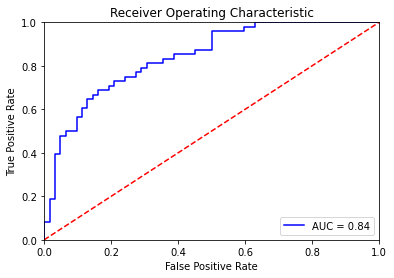

In [16]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Classification

In [17]:
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(X_train,y_train)

In [18]:
svc_y_test = sc_classifier.predict(X_test)
print(svc_y_test)

[1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0]


In [19]:
svc_y_train=sc_classifier.predict(X_train) 
print(svc_y_train)

[1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0]


In [20]:
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)   
svc_cm_test

array([[44, 18],
       [13, 35]], dtype=int64)

In [21]:
svc_cm_train =confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[184,  35],
       [ 35, 185]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test) 
svc_acc_test

0.7181818181818181

In [23]:
svc_acc_train= accuracy_score(y_train, svc_y_train)  
svc_acc_train

0.8405466970387244

In [24]:
svc_pred  =  sc_classifier.predict(X_test)

In [25]:
#Precision score on Test and Train
from sklearn.metrics import precision_score
sv_precision_test= precision_score(y_test, svc_y_test, average='weighted')  
print(sv_precision_test)
sv_precision_train=precision_score(y_train, svc_y_train, average='weighted')
print(sv_precision_train)

0.7232523848214016
0.8405466970387244


In [26]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, svc_pred)
roc_auc = metrics.auc(fpr, tpr)

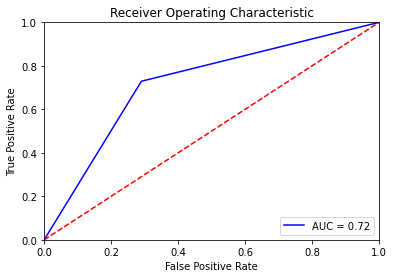

In [27]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Ada Boost Classification

In [28]:
#Perform AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=50, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)

C:\Users\Sudheer mamidi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [29]:
print(results)

[0.55555556 0.55555556 0.55555556 0.88888889 0.66666667 0.77777778
 0.55555556 0.77777778 0.88888889 0.77777778 0.88888889 0.66666667
 0.77777778 0.44444444 0.77777778 0.88888889 0.77777778 0.66666667
 0.66666667 1.         0.77777778 1.         0.55555556 0.77777778
 0.88888889 0.88888889 1.         0.88888889 0.77777778 0.66666667
 0.55555556 0.77777778 0.66666667 1.         0.77777778 0.66666667
 0.55555556 1.         0.66666667 1.         0.5        0.875
 0.625      1.         0.375      1.         0.625      1.
 0.625      0.75      ]


In [30]:
print(results.mean())

0.7563888888888889


In [31]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [32]:
ada_pred  =  model.predict(X_test)

In [33]:

ada_cm = confusion_matrix(y_test, ada_pred)
ada_ac = accuracy_score(y_test,ada_pred)

In [34]:
ada_cm

array([[44, 18],
       [ 5, 43]], dtype=int64)

In [35]:
ada_ac

0.7909090909090909

In [36]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, ada_pred)
roc_auc = metrics.auc(fpr, tpr)

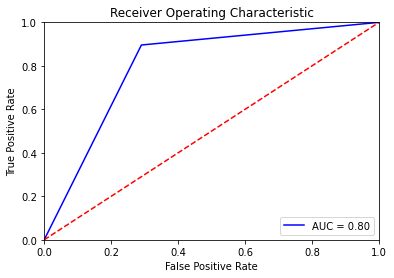

In [37]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()